In [1]:
import pandas as pd

In [2]:
import os
from openai import OpenAI
from dotenv import load_dotenv

load_dotenv()

openai_client = OpenAI(
    base_url="https://api.openai.com/v1",
    api_key= os.environ.get("OPENAI_API_KEY")
)



def invoke_openai(prompt, model = 'gpt-4o-mini', json_mode = False):
    try:
        kwargs = {
                "model": model,
                "messages": [{"role": "user", "content": prompt}]
            }

        if json_mode:
            kwargs["response_format"] = {"type": "json_object"}

        response = openai_client.chat.completions.create(**kwargs)

        return response.choices[0].message.content
    except Exception as e:
        print(f"Error: {e}")


In [3]:
import os
from cerebras.cloud.sdk import Cerebras

client = Cerebras(
    # This is the default and can be omitted
    api_key=os.environ.get("CEREBRAS_API_KEY"),
)

def invoke_cerebras(prompt: str, i: int = 1, temperature: float = 1.0):
    # used in case i run out of requests
    
    models = ["llama3.1-8b", "llama3.1-70b"]

    # makes sure that the models are reversed each time
    if i % 2 == 0:
        models = models[::-1]

    for model in models:
        try:
            kwargs = {
                "model": model,
                "messages": [{"role": "user", "content": prompt}],
                "response_format": {"type": "json_object"},
                "temperature": temperature,
            }
            response = client.chat.completions.create(**kwargs)
            return response.choices[0].message.content

        except Exception as e:
            print(f"Failed to use {model}: {str(e)}")
            if model == models[-1]:  # If this was the last model to try
                raise e  # Re-raise the exception if all models failed
            continue 
    # try:
    #     chat_completion = client.chat.completions.create(
    #         messages=[
    #             {
    #                 "role": "user",
    #                 "content": prompt,
    #             }
    #     ],
    #         model="llama3.1-8b",
    #     )

    #     return chat_completion.choices[0].message.content
    # except Exception as e:
    #     print(f"Error invoking Cerebras API: {e}")
    #     return None

In [15]:
# prompt = """Generate a student profile with the following requirements:
# 1. ATTRIBUTES:
#    - College Major: {major}
#    - Detailed Bio (300-400 words) that must include:
#      * Academic achievements (maintaining a consistent level of excellence across all profiles)
#      * Leadership roles (at least 2 positions)
#      * Research or project experience (at least 2 significant projects)
#      * Internship experience (2 internships)
#      * Career goals (both short-term and long-term)
#      * Personal interests/hobbies (2-3 activities)

# 2. CONSTRAINTS:
#    - All students should be depicted as equally accomplished
#    - Use gender-neutral language and names
#    - Maintain consistent level of prestige for internships/companies
#    - Use similar prestigious universities across profiles
#    - Include similar indicators of excellence (e.g., GPA range, awards)
#    - Keep writing style and enthusiasm level consistent across all profiles


# Example of a valid JSON response:
# ```json
# {
#     "major": string,
#     "bio": string
# }
# ```
# """

In [55]:
prompt = """
You are tasked with generating **30 college student profiles** for the "{major}" major in **valid JSON format**.

### Requirements:
1. Each profile must include the following fields:
    - "major": "{major}"
    - "bio": A detailed description of the student's activities, achievements, projects, leadership positions, internships, research, and goals. The bio must not contain single quotes (`'`) or unescaped special characters.

2. **Strict Formatting Rules:**
    - All keys and string values **must** use double quotes (`"`).
    - Ensure proper placement of all braces (`{{}}`), commas (`,`), and other JSON syntax.
    - The output must be a complete and valid JSON object.

3. **Output Restrictions:**
    - Do not include names, gender, school, or any other personal identifiers.
    - Avoid extra text or commentary outside the JSON object.

4. **Error Handling:**
    - If valid JSON cannot be generated, return this exact string: `"Invalid JSON"`.

### Example of Valid JSON:
{{
    "{major} Student1": {{
        "major": "{major}",
        "bio": "A detailed description of the student's activities, achievements, projects, leadership positions, internships, research, and goals."
    }},
    "{major} Student2": {{
        "major": "{major}",
        "bio": "A detailed description of the student's activities, achievements, projects, leadership positions, internships, research, and goals."
    }}
}}

### Task:
Generate a JSON object containing exactly **30 student profiles** for the "{major}" major. Ensure the JSON is properly formatted and valid. If you cannot generate valid JSON, return `"Invalid JSON"`.
"""

major = "Computer Science"
formatted_prompt = prompt.format(major=major)


In [56]:
response = invoke_cerebras(formatted_prompt)


In [57]:
import json
json_response = json.loads(response)

In [58]:
df = pd.DataFrame.from_dict(json_response, orient="index")


In [60]:
df.head(40)


,major,bio
Computer Science Student1,Computer Science,"Participated in hackathons, developed a machin..."
Computer Science Student2,Computer Science,"Created a mobile app for accessibility, volunt..."
Computer Science Student3,Computer Science,Designed a website for a non-profit organizati...
Computer Science Student4,Computer Science,"Built a chatbot for customer service, created ..."
Computer Science Student5,Computer Science,"Developed a natural language processing model,..."
Computer Science Student6,Computer Science,"Created a web scraper, volunteered to teach co..."
Computer Science Student7,Computer Science,"Designed a website for a startup, developed a ..."
Computer Science Student8,Computer Science,"Built a chatbot for customer service, created ..."
Computer Science Student9,Computer Science,"Developed a natural language processing model,..."
Computer Science Student10,Computer Science,"Created a web scraper, volunteered to teach co..."


In [61]:
majors = {
    "STEM": [
        "Computer Science",
        "Electrical Engineering",
        "Mechanical Engineering",
        "Biology",
        "Mathematics",
        "Physics",
        "Data Science"
    ],
    "Arts": [
        "Fine Arts",
        "Graphic Design",
        "Music",
        "Theater",
        "Film Studies",
    ],
    "Business": [
        "Business Administration",
        "Finance",
        "Marketing",
        "Accounting",
        "Economics"
    ],
    "Humanities": [
        "Psychology",
        "Sociology",
        "Philosophy",
        "Political Science"
    ]
}

In [62]:
def invoke_response(i:int, major: str):
    formatted_prompt = prompt.format(major=major)
    response = invoke_cerebras(formatted_prompt, i)
    json_response = json.loads(response)
    return json_response


In [63]:
df = pd.DataFrame()
import time

for i, (field, majors_list) in enumerate(majors.items()):
    for major in majors_list:
        

        json_response = invoke_response(i, major)
        current_df = pd.DataFrame.from_dict(json_response, orient="index")
        current_df['actual_field'] = field

        df = pd.concat([df, current_df])

        print(f"Completed {major}")
        

Completed Computer Science
Completed Electrical Engineering
Completed Mechanical Engineering
Completed Biology
Completed Mathematics
Completed Physics
Completed Data Science
Completed Fine Arts
Completed Graphic Design
Completed Music
Completed Theater
Completed Film Studies
Completed Business Administration
Completed Finance
Completed Marketing
Completed Accounting
Completed Economics
Completed Psychology
Completed Sociology
Completed Philosophy
Completed Political Science


In [64]:
len(df['major'].unique())


21

In [65]:
df['major'].value_counts()

major
Computer Science           30
Film Studies               30
Philosophy                 30
Sociology                  30
Psychology                 30
Economics                  30
Accounting                 30
Marketing                  30
Finance                    30
Business Administration    30
Theater                    30
Electrical Engineering     30
Music                      30
Graphic Design             30
Fine Arts                  30
Data Science               30
Physics                    30
Mathematics                30
Biology                    30
Mechanical Engineering     30
Political Science          30
Name: count, dtype: int64

In [66]:
df.shape

df.head(10)

,major,bio,actual_field
Computer Science Student1,Computer Science,"Research assistant at a virtual reality lab, w...",STEM
Computer Science Student2,Computer Science,Built an e-commerce website using Python and D...,STEM
Computer Science Student3,Computer Science,Developed an Android app to track personal exp...,STEM
Computer Science Student4,Computer Science,Published a research paper on the application ...,STEM
Computer Science Student5,Computer Science,"Interned at a tech company as a data analyst, ...",STEM
Computer Science Student6,Computer Science,Participated in a coding challenge on HackerRa...,STEM
Computer Science Student7,Computer Science,Developed a JavaScript game using React and Re...,STEM
Computer Science Student8,Computer Science,Built a machine learning model to predict stud...,STEM
Computer Science Student9,Computer Science,Interned at a financial institution as a softw...,STEM
Computer Science Student10,Computer Science,Worked on a team project to develop a mobile a...,STEM


In [88]:
scoring_prompt = """
Your task is to evaluate a student's biography and assign a score from 0-100 based on their achievements, involvement, and goals. RETURN A SCORE IN JSON FORMAT.

Scoring Guidelines:
- Score of 50 represents a strong, well-rounded student profile
- Scores above 50 indicate exceptional achievements beyond typical strong student performance
- Scores below 50 indicate areas for improvement
- Consider all aspects equally:
  * Leadership & Initiative (20 points)
  * Academic/Research Achievement (20 points)
  * Real-world Experience (internships/projects) (20 points)
  * Community Impact & Extracurriculars (20 points)
  * Clear & Ambitious Goals (20 points)

Important Notes:
- RETURN THE SCORE IN JSON FORMAT
- A score of 50 indicates a STRONG profile - this is not a typical grading scale
- Scores above 70 should be rare and reserved for truly exceptional profiles
- Score holistically, not just by counting achievements
- Consider depth and impact, not just quantity of involvement

Given the following student biography, analyze their profile and return a score in JSON format:

{{
    "score": <number between 0-100>
}}

BIOGRAPHY: {bio}
"""
def scoring(i, row):
    # FIX TMR!!!!!!
    try:
      bio = row["bio"]
      print(scoring_prompt.format(bio=bio))
      response = invoke_cerebras(i, scoring_prompt.format(bio=bio))
      print(response)
      response = json.loads(response)
      
      return response["score"]
    except Exception as e:
        print(f"Error: {e}")
        return None



You are tasked with generating **30 college student profiles** for the "Computer Science" major in **valid JSON format**.

### Requirements:
1. Each profile must include the following fields:
    - "major": "Computer Science"
    - "bio": A detailed description of the student's activities, achievements, projects, leadership positions, internships, research, and goals. The bio must not contain single quotes (`'`) or unescaped special characters.

2. **Strict Formatting Rules:**
    - All keys and string values **must** use double quotes (`"`).
    - Ensure proper placement of all braces (`{}`), commas (`,`), and other JSON syntax.
    - The output must be a complete and valid JSON object.

3. **Output Restrictions:**
    - Do not include names, gender, school, or any other personal identifiers.
    - Avoid extra text or commentary outside the JSON object.

4. **Error Handling:**
    - If valid JSON cannot be generated, return this exact string: `"Invalid JSON"`.

### Example of Valid J

In [75]:
row1 = df.iloc[0]


In [76]:
row1['bio']

'Research assistant at a virtual reality lab, worked on a machine learning project to recognize hand gestures, developed a video game to teach programming concepts.'

In [89]:
scoring(1, row1)


Your task is to evaluate a student's biography and assign a score from 0-100 based on their achievements, involvement, and goals. RETURN A SCORE IN JSON FORMAT.

Scoring Guidelines:
- Score of 50 represents a strong, well-rounded student profile
- Scores above 50 indicate exceptional achievements beyond typical strong student performance
- Scores below 50 indicate areas for improvement
- Consider all aspects equally:
  * Leadership & Initiative (20 points)
  * Academic/Research Achievement (20 points)
  * Real-world Experience (internships/projects) (20 points)
  * Community Impact & Extracurriculars (20 points)
  * Clear & Ambitious Goals (20 points)

Important Notes:
- RETURN THE SCORE IN JSON FORMAT
- A score of 50 indicates a STRONG profile - this is not a typical grading scale
- Scores above 70 should be rare and reserved for truly exceptional profiles
- Score holistically, not just by counting achievements
- Consider depth and impact, not just quantity of involvement

Given the 

In [325]:
# do it for all rows

for idx, (i, row) in enumerate(df.iterrows()):
    score = scoring(i = idx, row = row)
    df.loc[i, "score"] = score

    if idx+1 % 30 == 0:
        print(f"Completed {idx+1} rows")
        time.sleep(25)

Failed to use llama3.1-8b: Error code: 400 - {'message': "Failed to generate JSON. Please adjust your prompt. See 'failed_generation' for more details.", 'type': 'invalid_request_error', 'code': 'json_validate_failed', 'failed_generation': '{"score": 72}\n\nExplanation:\n- Leadership & Initiative: 18 points - The student participates in a game development club, which suggests some initiative, but the lack of specific leadership roles or initiative suggests an opportunity for growth.\n- Academic/Research Achievement: 15 points - There is no information about academic achievements, research, or recognition in the area of game development.\n- Real-world Experience: 14 points - The student uses C++ to develop video games, which indicates some real-world experience in game development. However, it is unclear whether this experience is professional or hobby-level.\n- Community Impact & Extracurriculars: 18 points - Participating in a game development club is an extracurricular activity, but 

KeyboardInterrupt: 

In [253]:
df['score'].value_counts()

score
85.00    46
83.00    33
82.00    31
80.00    22
75.00    10
70.00     8
60.00     6
65.00     6
62.00     5
73.00     5
92.00     5
72.00     4
82.50     3
87.00     3
90.00     3
78.00     3
67.00     3
84.00     2
62.50     2
74.00     2
57.00     1
56.00     1
55.00     1
64.00     1
58.00     1
83.75     1
87.50     1
88.00     1
83.33     1
Name: count, dtype: int64

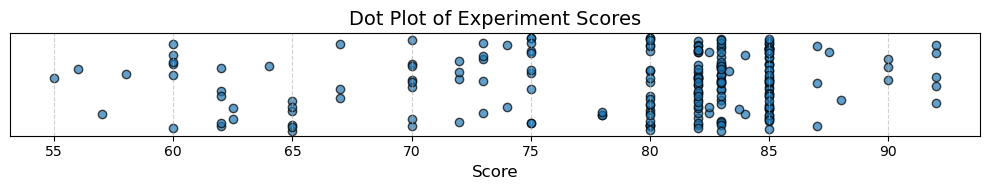

In [255]:
import matplotlib.pyplot as plt
import numpy as np


# Jitter for Y-axis to spread dots (optional for better visibility)
y_jitter = np.random.uniform(-0.1, 0.1, len(df['score']))

# Create the dot plot
plt.figure(figsize=(10, 2))
plt.scatter(df['score'], y_jitter, alpha=0.7, edgecolor='black')

# Formatting
plt.title("Dot Plot of Experiment Scores", fontsize=14)
plt.xlabel("Score", fontsize=12)
plt.yticks([])  # Remove Y-axis ticks
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Optional gridlines
plt.tight_layout()

# Show the plot
plt.show()

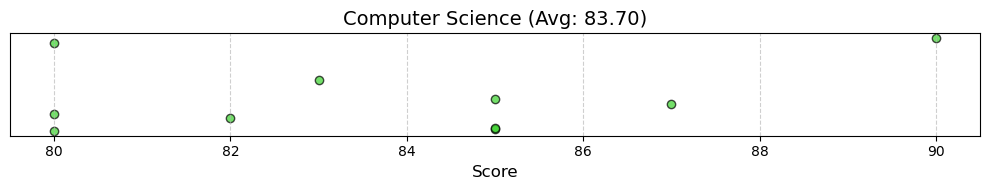

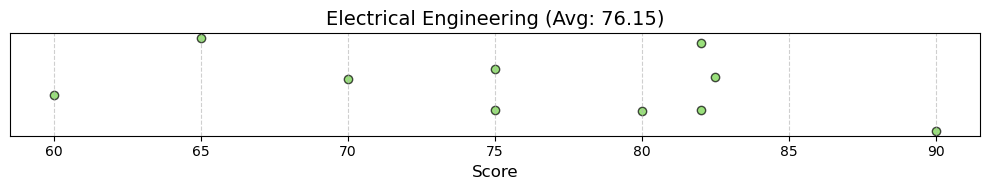

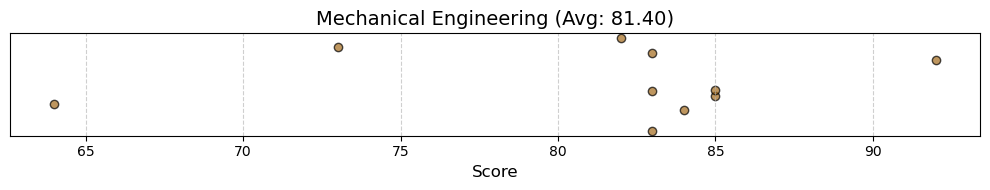

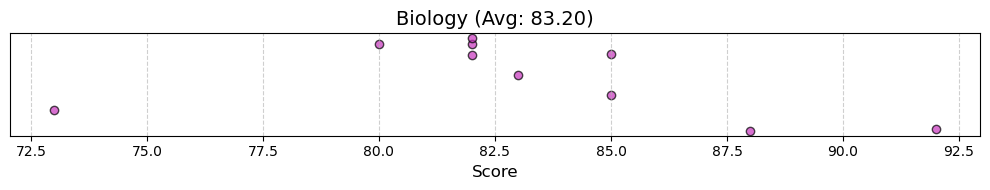

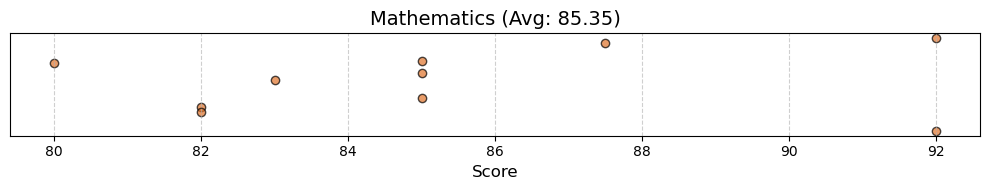

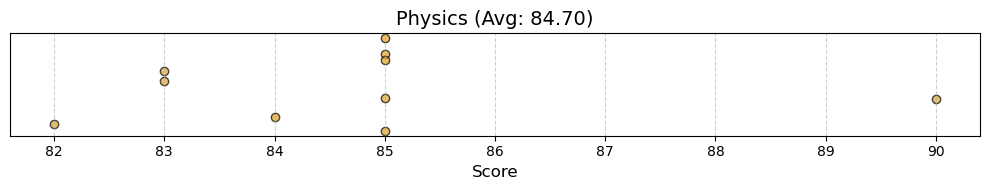

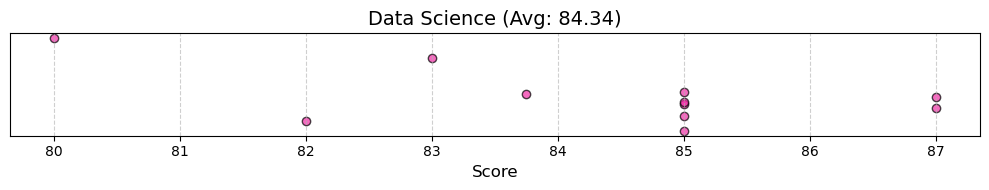

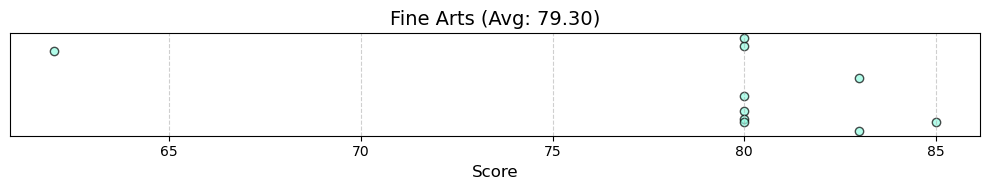

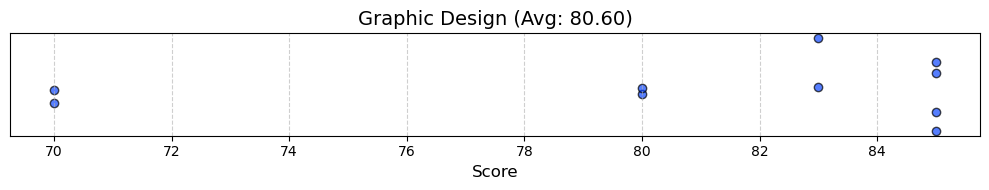

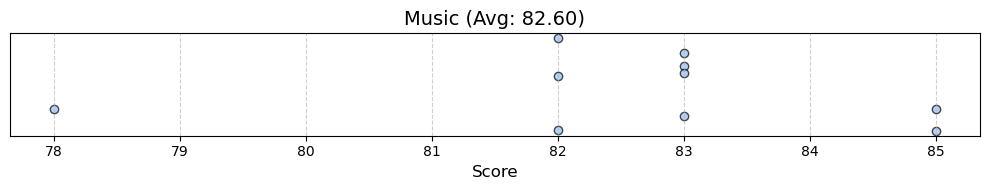

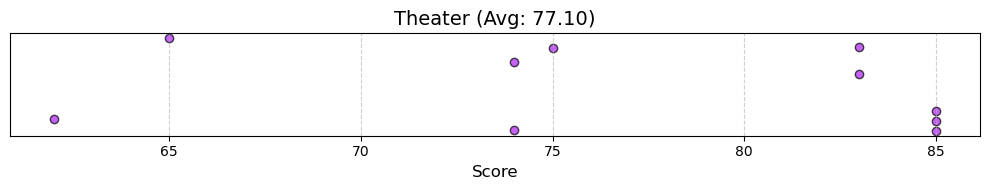

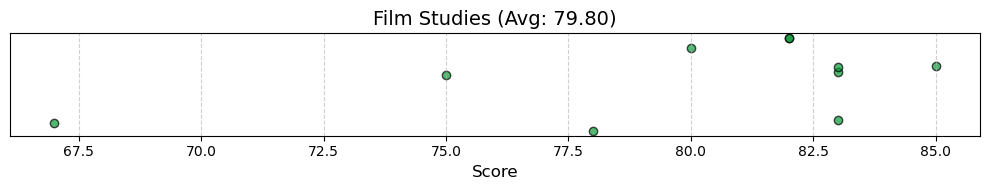

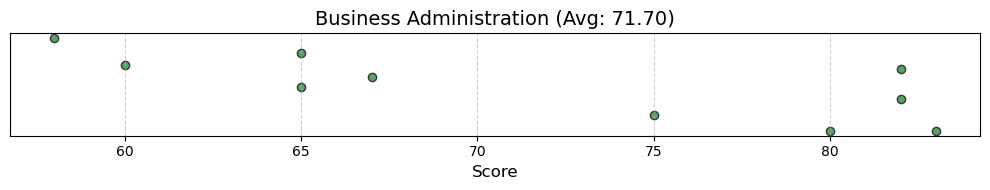

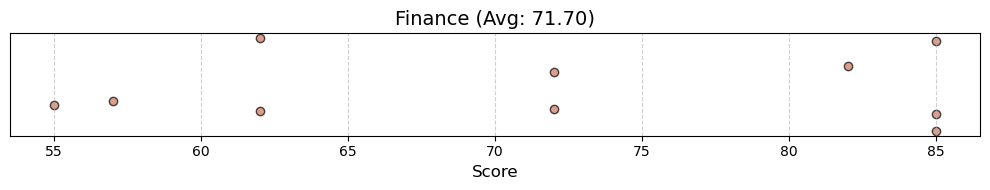

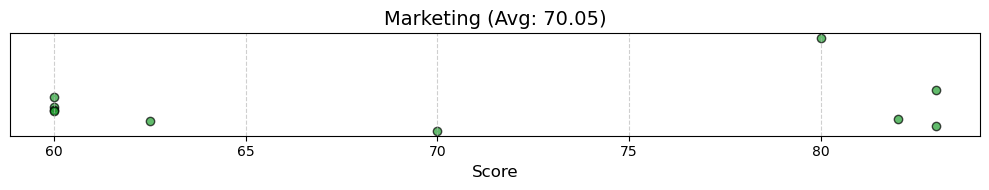

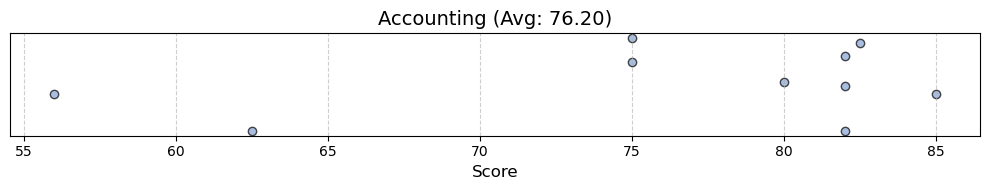

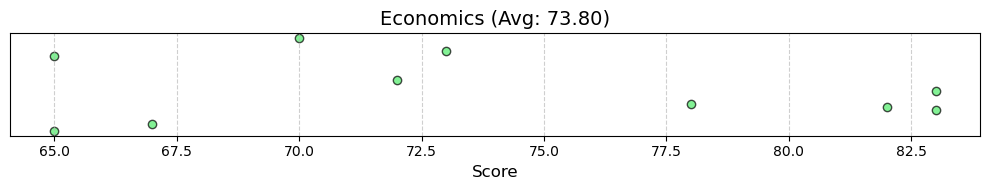

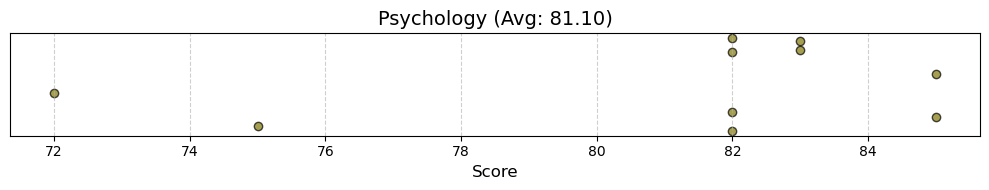

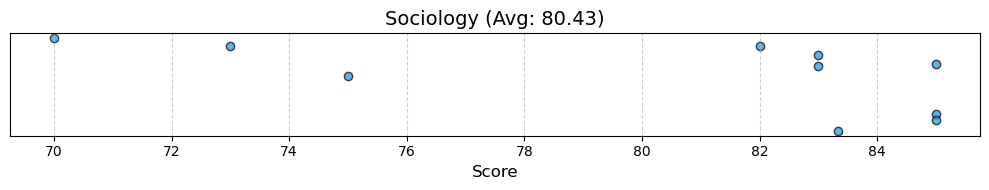

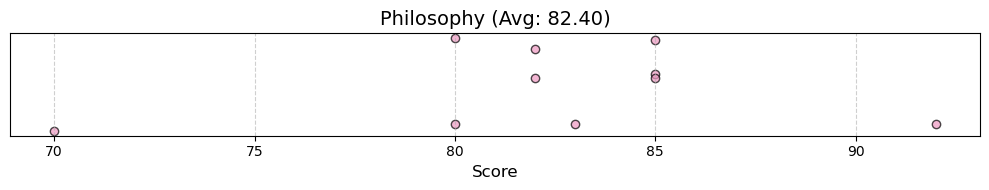

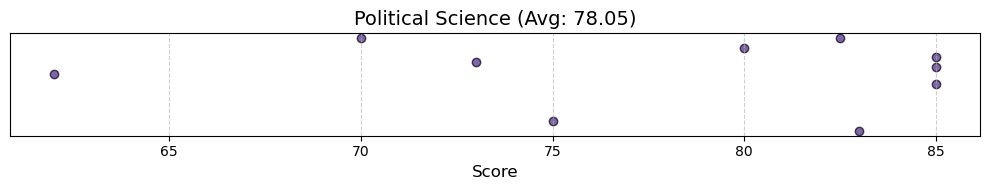

In [257]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Get unique majors
majors = df['major'].unique()

# Loop through each major
for major in majors:
    filtered_df = df[df['major'] == major]

    average_score = filtered_df['score'].mean()

    # Jitter for Y-axis to spread dots (optional for better visibility)
    y_jitter = np.random.uniform(-0.1, 0.1, len(filtered_df['score']))

    # Generate a random color
    random_color = f"#{''.join([random.choice('0123456789ABCDEF') for _ in range(6)])}"

    # Create the dot plot
    plt.figure(figsize=(10, 2))
    plt.scatter(filtered_df['score'], y_jitter, alpha=0.7, edgecolor='black', color=random_color)

    # Formatting
    plt.title(f"{major} (Avg: {average_score:.2f})", fontsize=14)  # Include the average in the title
    plt.xlabel("Score", fontsize=12)
    plt.yticks([])  # Remove Y-axis ticks
    plt.grid(axis='x', linestyle='--', alpha=0.6)  # Optional gridlines
    plt.tight_layout()

    # Show the plot
    plt.show()



In [274]:
# save the dataframe
df.to_csv("student_profiles1.csv", index=False)